<a href="https://colab.research.google.com/github/jamesjulius-02/K-Nearest-Neighbors-KNN-/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.6666666666666666
Confusion Matrix:
[[11  0  0]
 [ 0  5  8]
 [ 0  2  4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.71      0.38      0.50        13
           2       0.33      0.67      0.44         6

    accuracy                           0.67        30
   macro avg       0.68      0.68      0.65        30
weighted avg       0.74      0.67      0.67        30



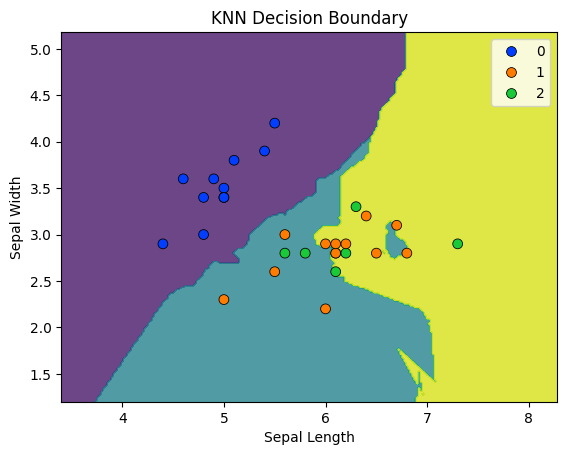

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using sepal length and sepal width as features
y = iris.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the KNN model with k=5
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Plotting the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='bright', edgecolor='k', s=50)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('KNN Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, model)
